# Step 1. Image to Text : PaliGemma

In [2]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch

model_id = "google/paligemma-3b-mix-224"

# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
# image = Image.open(requests.get(url, stream=True).raw)

# model = PaliGemmaForConditionalGeneration.from_pretrained(model_id).eval()
# processor = AutoProcessor.from_pretrained(model_id)

# # Instruct the model to create a caption in Spanish
# prompt = "caption es"
# model_inputs = processor(text=prompt, images=image, return_tensors="pt")
# input_len = model_inputs["input_ids"].shape[-1]

# with torch.inference_mode():
#     generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
#     generation = generation[0][input_len:]
#     decoded = processor.decode(generation, skip_special_tokens=True)
#     print(decoded)

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.
Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:31<00:00, 10.40s/it]
You're using a GemmaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Un auto azul estacionado frente a un edificio.


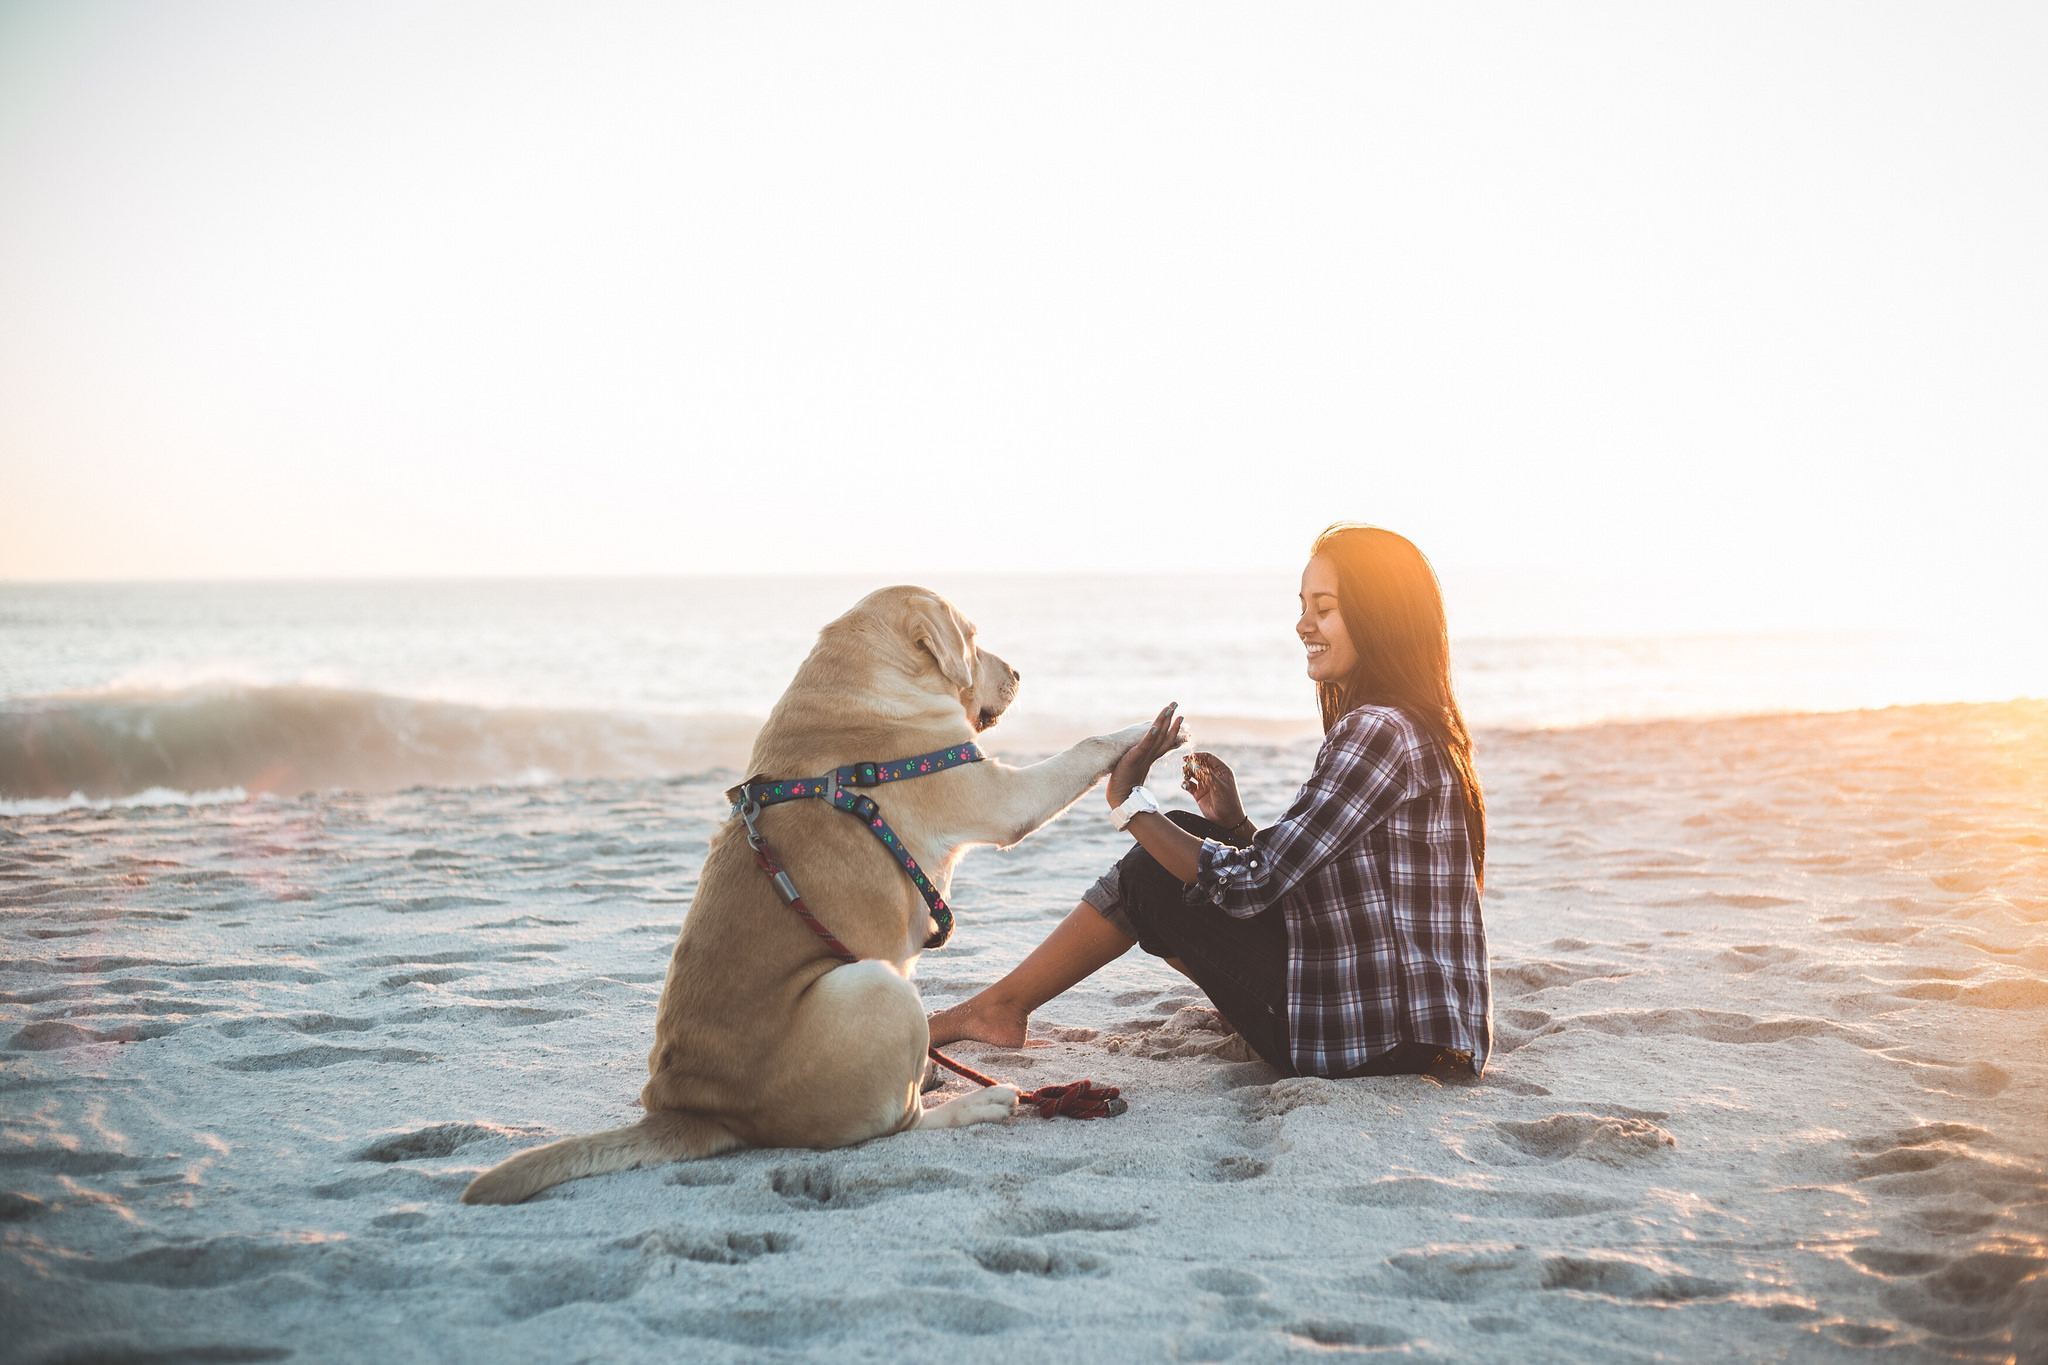

In [14]:
from PIL import Image
image = Image.open("/Users/kyunghokim/ml/dlai_202403_open_source_models_with_hugging_face/beach.jpeg")
image

In [6]:
prompt = "describe this image as detail as possible"
model_inputs = processor(text=prompt, images=image, return_tensors="pt")
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

In this image we can see a woman sitting on the sand and a dog is sitting on the sand. In the background we can see the sky.


# Step 2. Text-to-Text : (LlaMa3 8B) Music Generation Prompt

In [7]:
from langchain_community.llms import Ollama
from langchain.chains import ConversationChain
from langchain.prompts import ChatPromptTemplate
from langchain.memory import ConversationBufferMemory

llm = Ollama(model="llama3:8b")

In [8]:
# Initialize memory to store conversation history
memory = ConversationBufferMemory(memory_key="chat_history")

# Define your prompt template
prompt = ChatPromptTemplate.from_template("""
### System:
You are a prompt generator for music generative AI. Please generate music generation prompts inspired by the following User input describing an image,

### User:
{chat_history}
{input}

### Response:
""")

# Create the conversation chain
conversation_chain = ConversationChain(
    llm=llm,
    prompt=prompt,
    memory=memory,
    verbose=True  # This will print the intermediate steps for debugging
)


In [9]:
def get_response(user_input, chain):
    # Generate the response
    response = chain.run({"input": user_input})
    return response

In [10]:
# music_gen_input = f"You are a prompt generator for music generative AI. Please generate music generation prompts inspired by the following User input describing an image{decoded}"
# print(music_gen_input)
response = get_response(decoded, conversation_chain)
print(f"Assistant: {response}")


/Users/kyunghokim/.pyenv/versions/3.11.5/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new ConversationChain chain...
Prompt after formatting:
Human: 
### System:
You are a prompt generator for music generative AI. Please generate music generation prompts inspired by the following User input describing an image,

### User:

In this image we can see a woman sitting on the sand and a dog is sitting on the sand. In the background we can see the sky.

### Response:


> Finished chain.
Assistant: What a lovely scene! Here are some music generation prompts inspired by your description:

1. **Coastal Harmony**: Create a laid-back, atmospheric track that captures the serene moment of the woman and dog sitting together on the sandy beach, with gentle waves lapping in the background.
2. **Skybound Serenade**: Write a piece that evokes the vastness of the sky above, with soaring melodies and a sense of freedom. The woman and dog should be secondary characters, adding warmth and companionship to the overall mood.
3. **Sandcastles and Sunsets**: Compose a whimsical tune 

In [11]:
response

'What a lovely scene! Here are some music generation prompts inspired by your description:\n\n1. **Coastal Harmony**: Create a laid-back, atmospheric track that captures the serene moment of the woman and dog sitting together on the sandy beach, with gentle waves lapping in the background.\n2. **Skybound Serenade**: Write a piece that evokes the vastness of the sky above, with soaring melodies and a sense of freedom. The woman and dog should be secondary characters, adding warmth and companionship to the overall mood.\n3. **Sandcastles and Sunsets**: Compose a whimsical tune that captures the carefree joy of children building sandcastles (even if there are no kids in the image). Incorporate playful piano riffs and a warm, sunny vibe.\n4. **Tethered Together**: Focus on the special bond between the woman and her dog. Create a heartfelt ballad that explores their connection, with gentle guitar strumming and sweet harmonies.\n5. **Seaside Reflections**: Produce a contemplative piece that 

# Step 3. Text-to-Music 

In [12]:
from transformers import pipeline
import scipy

synthesiser = pipeline("text-to-audio", "facebook/musicgen-small")

python3.11(9584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/kyunghokim/.pyenv/versions/3.11.5/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/Users/kyunghokim/.pyenv/versions/3.11.5/lib/python3.11/site-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clo

In [13]:
music_prompt = response
music = synthesiser(music_prompt, forward_params={"do_sample": True})

scipy.io.wavfile.write("musicgen_out.wav", rate=music["sampling_rate"], data=music["audio"])


Using the model-agnostic default `max_length` (=1500) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


In [16]:
from IPython.display import Audio

# Path to the WAV file
wav_file_path = 'musicgen_out.wav'

# Display the audio player
Audio(wav_file_path)